Below is the simple nerual networks used to learn how to predict the universal functional.

In [98]:
import numpy as np
import keras
from keras import layers
from keras import utils
from sklearn.model_selection import train_test_split as tts
import datetime


dataset = np.loadtxt(r"C:\Users\aaron\Google Drive\Final Year Project\Data\variationaldata\canonicaltraining.csv", delimiter = ',')
X = dataset[:,0:8]
Y = dataset[:,8:16]

x, xt, y, yt = tts(X,Y)
print(x,xt,y,yt)
def build_model1():
    model = keras.Sequential([
        layers.Input(shape=(x.shape[1],)),
        layers.Dense(32,activation = 'relu'),
        layers.Dense(64,activation = 'relu'),
        layers.Dense(128,activation = 'relu'),
        layers.Dense(8)
        ], name="SimpleModel")
    
    model.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae'])
    return model


sample_size = x.shape[0]
time_steps = x.shape[1]
input_dimension = 1
xn = x.reshape(sample_size,time_steps,input_dimension)
sample_size_t = xt.shape[0]
time_steps_t = xt.shape[1]
input_dimension_t = 1
xtn = xt.reshape(sample_size_t,time_steps_t,input_dimension_t)

def build_model2():
    n_timesteps = xn.shape[1]
    n_features = xn.shape[2]
    
    model = keras.Sequential([
        layers.Input(shape=(n_timesteps,n_features)),
        layers.Conv1D(filters=8, kernel_size=2),
        layers.Dense(128,activation = 'relu'),
        layers.Dense(128,activation = 'relu'),
        layers.Dense(1)
        ], name='Conv1D')
    
    model.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae'])
    return model

model = build_model1()
model.summary()

#log_dir = "/content/drive/MyDrive/Final Year Project/Data/logs/fit/84data100batch75epoch"
#tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#fitting = model.fit(x,y,epochs=75, batch_size=100, callbacks=[tensorboard_callback], validation_split=0.2)
fitting = model.fit(x,y,epochs=20, batch_size=150,validation_split=0.25)

score = model.evaluate(xt, yt, verbose = 1)


print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

[[1.38075346 0.36765214 0.68671471 ... 1.76769091 0.76221076 1.2023554 ]
 [0.76601752 1.65036697 0.74578338 ... 0.38492828 0.7823748  0.74752669]
 [1.71020365 0.42746467 0.74090819 ... 0.97194761 0.08977815 0.40100736]
 ...
 [0.01137291 0.46616252 1.36878507 ... 0.25436576 1.5862929  0.4050813 ]
 [0.38686692 0.09041962 0.86441683 ... 0.99844644 1.55832193 0.44253486]
 [0.52995655 0.6462386  0.38241735 ... 1.7275497  1.01132496 0.3964343 ]] [[1.62619463 0.29931353 0.88968485 ... 0.02953693 0.47123842 0.06696075]
 [1.73918157 0.58829963 1.97709739 ... 1.41120264 1.93653708 0.54293271]
 [1.38467793 1.75787025 1.8843737  ... 0.06946952 1.89318364 1.61569657]
 ...
 [1.46051179 0.99175877 1.49156667 ... 0.91575576 0.01506714 1.87041627]
 [0.0087155  0.70280846 1.92202214 ... 0.59388886 0.16026304 0.91706266]
 [1.14231804 1.63282084 1.27906239 ... 0.63215282 0.0564853  1.35667585]] [[0.47340307 0.55703157 0.53718993 ... 0.42300221 0.57606418 0.47738917]
 [0.56598451 0.38817619 0.5670754  ... 

In [99]:
predictionset = np.loadtxt(r'C:\Users\aaron\Google Drive\Final Year Project\Data\variationaldata\canonicaltesting.csv', delimiter = ',')
xp = predictionset[:,0:8]
yp = predictionset[:,8:16]
zp = predictionset[:,0:8]

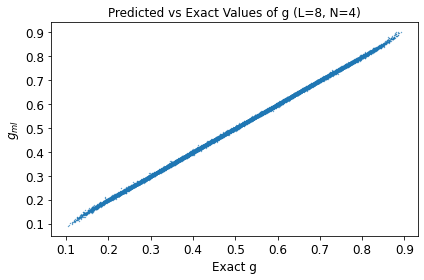

In [100]:
import matplotlib.pyplot as plt
line = np.linspace(-0.42,-0.3)
#plt.plot(line,line, color = 'red',label = 'predicted = exact')
plt.scatter(yp,model.predict(xp),s=0.1)
plt.title("Predicted vs Exact Values of g (L=8, N=4)",fontsize=12)
plt.xlabel("Exact g",fontsize=12)
plt.ylabel(r"$g_{ml}$",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Final Year Project/Data/Images/canonical/84predictbatch50c.png')

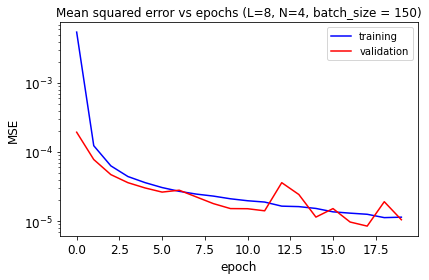

In [101]:
plt.plot(fitting.history['loss'], color = 'blue')
plt.plot(fitting.history['val_loss'], color = 'red')
plt.title('Mean squared error vs epochs (L=8, N=4, batch_size = 150)')
plt.ylabel('MSE',fontsize=12)
plt.yscale('log')
plt.xlabel('epoch',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['training', 'validation'], loc='upper right')
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Final Year Project/Data/Images/niloss.png')

In [102]:
#plt.scatter(predictions,residuals,s=0.5)
#plt.plot(predictions,np.zeros(len(xp)),color = 'red')
#plt.title(r'Difference in $g_{ml}$ and $g_{exact}$ vs $g_{ml} (L=8, N=4)$',fontsize=12)
#plt.xlabel(r'$g_{ml}$',fontsize=12)
#plt.ylabel(r'$g_{ml}-g_{exact}$',fontsize=12)
#plt.ylim(-0.1,0.1)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
#plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Final Year Project/Data/Images/canonical/84residualsbatch50c.png')

Here I will plot 5 random test subjects along with the networks predictions to show the accuracy visually

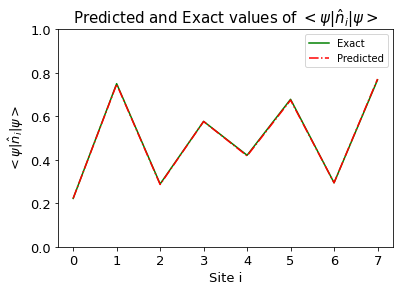

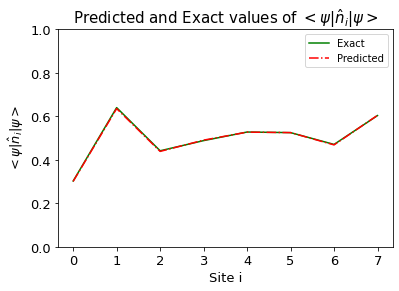

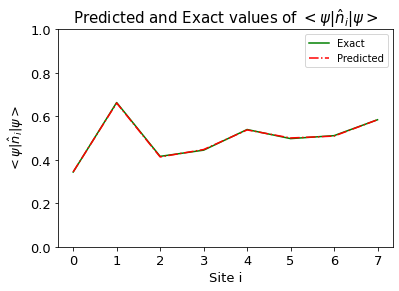

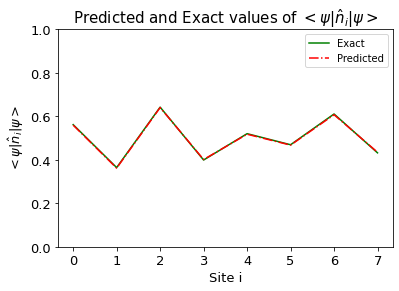

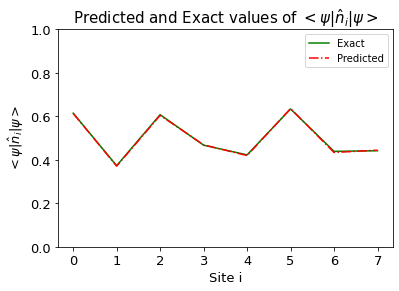

In [103]:
for i in range(5):
  choice = int(np.random.choice(1000,1))
  plt.figure(i)
  plt.title(r'Predicted and Exact values of $<\psi|\hat n_{i}|\psi>$',fontsize=15)
  plt.plot(yp[choice],label='Exact',color='green')
  plt.plot(model.predict(xp)[choice],linestyle='dashdot',label='Predicted',color='red',markersize=1)
  plt.xlabel('Site i',fontsize=13)
  plt.ylabel(r'$<\psi|\hat n_{i}|\psi>$',fontsize=13)
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.ylim(0,1)
  plt.legend()
  #plt.savefig(f'/content/drive/MyDrive/Final Year Project/Data/Images/ni_prediction{i}.png')

The next cell pulls a random sample from the set of densities, and shows all 100 randomly chosen variations on this density lead to higher helmholtz free energies

In [104]:
#generate random number to pick out a random sample
choice = int(np.random.choice(1000,1))

#define the actual energies, densities and functional of the selected sample
energies = zp
densities = xp
F = yp
E = F[choice] + np.dot(energies[choice],densities[choice])

#now have to show this functional minimises at the GS density, ie to show for small variations in n the functional must increase
var = np.zeros((1000,len(densities[choice])))

for i in range(1000):
  for j in range(4):
    delta =  np.random.rand()*np.random.choice([-0.1,0.1])
    var[i][j] = densities[choice][j]+delta
    var[i][j+4] = densities[choice][j+4]-delta        #has to be done to preserve particle number
  
  #x =np.sum(var[i])
  #var[i][7] = 0.5-x
 
#print("Actual n = ",densities[choice])
#print("Variations of n = ", var)
#print("predicted f for varied n = ", model.predict(var))
#print("Actual f = ", F[choice])

dist = []
vals = []

for i, v in enumerate(var):
  dist1 = v-densities[choice]
  dist.append(np.sqrt(np.dot(dist1,dist1)))
  vals.append(np.linalg.norm(model.predict(var)[i]+np.dot(energies[choice],v)-E))
  #print(f"predicted energy increase for varied n{i} =", vals[i])

#print(dist)
#print(vals)
#print("Actual E = ", E)

Text(0.5, 0, '$|\\delta \\vec{n}|$ ')

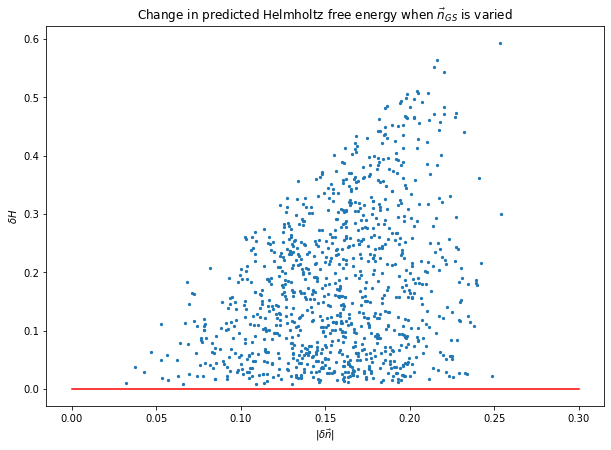

In [105]:
plt.figure(figsize=(10,7))
plt.scatter(dist,vals,s=5)
plt.title(r"Change in predicted Helmholtz free energy when $\vec n_{GS}$ is varied")
plt.plot(np.linspace(0,0.3),np.zeros(50),color = 'red')
#plt.ylim([-0.1,1])
plt.ylabel(r"$\delta H$")
plt.xlabel(r"$|\delta \vec{n}|$ ")
#plt.savefig('/content/drive/MyDrive/Final Year Project/Data/variationaldata/var.png')

I want to show that if I take some set of on site energies $\{\epsilon_{i}\}$, and try to minimise the value of $E = \sum_{i} \epsilon_{i} n_{i} + F_{ml}$ by varying $n_{i}$, then the resulting $n_{i}$ should be the correct density associated to the ground state.

So I'll pull out a random energy set and the corresponding densities, generate a new set of random densities and see if miniminsing the energy equation above converges to the correct density
. Ill need a gradient descent algorithm.

To carry out the gradient descent I need to be able to calculate the derivative of the energy, which I will define as.
$\frac{\partial E}{\partial n_{i}} = \epsilon_{i} + \frac{F[n_{i}+\Delta]+F[n_{i}-\Delta]}{2 \Delta}$

Where the derivative of the functional is approximated by a finite difference method. This will be an eight component vector and so we I can propose new points.

$\{\tilde n_{i}\} = \{n_{i}\} - \delta \nabla E[\{n_{i}\}]$
where $\delta$ is some number < 1 representing the learning rate. I'll probably just use the same value as the step size in the derivative i.e. $\delta = \Delta$ 

In [106]:
predictionset = np.loadtxt(r'C:\Users\aaron\Google Drive\Final Year Project\Data\variationaldata\canonicaltesting.csv', delimiter = ',')
xp = predictionset[:,8:16]
yp = predictionset[:,16]
zp = predictionset[:,0:8]

In [107]:
def delF(den1,den2,delta1):
  return (model.predict(den1)-model.predict(den2))/(2*delta1)


In [108]:
def gd(en,de):

  #define the density/occupation vector as the one passed to the function
  density = de
  normdelE = []
  energy = en
  delta = 0.01
  #here I create a vector for the gradient of E
  delE = np.ones(8)
  #print("delE = ", delE, "\n")

  #now I populate the derivative vector
  #loop over j for the iterations
  for j in range(50):
    #print(j)
    #the loop over i populates each component
    for i in range(8):

      #first create two densities that we will vary the components of 
      density1 = np.copy(density)
      density2 = np.copy(density)
      
      density1[i] += delta
      density2[i] -= delta
      #print("Density 1 = ", density1, "\n")
      #print("Density 2 = ", density2, "\n")

      #print("delF = ", delF(density1.reshape(1,8), density2.reshape(1,8), delta), "\n")
      delE[i] = en[i]#+delF(density1.reshape(1,8),density2.reshape(1,8),delta)
    
    delE+=delF(density1.reshape(1,8),density2.reshape(1,8),delta).reshape(8,)
    
    #print("delE = ", delE)
    #print("Norm delE = ", np.linalg.norm(delE), "\n")
    density = density-0.01*delE
    r = 4.0/np.sum(density)
    density = density*r
    normdelE.append(np.linalg.norm(delE))
    if np.all(density>0) and np.all(density<1):
      j+=1
    else:
      break

  #print(np.sum(density))
  #plt.figure(1) 
  #plt.plot(np.linspace(1,j,j),normdelE)
  return density

Choice 1 =  4
On site energies =  [0.01574353 0.4340542  1.36808197 1.89639808 1.32011168 0.04903902
 1.17120032 0.23121971] 

Starting guess of densities =  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5] 

Correct density vector =   [0.43833813 0.60676939 0.39168648 0.53791763 0.34972862 0.70423973
 0.31253006 0.65878996] 

Converged Soln =  [ 0.82813837  0.72951736  0.18441877 -0.00316961  0.20813117  0.91971254
  0.25696347  0.87628794]


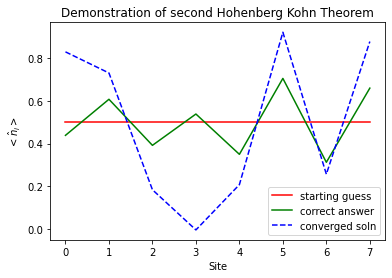

In [109]:
#creating two random numbers so that we get a random set of energies and densties
choice1 = int(np.random.choice(1000,1))
choice2 = int(np.random.choice(1000,1))
print("Choice 1 = ", choice1)
print("On site energies = ", zp[choice1], "\n")
print("Starting guess of densities = ", 0.5*np.ones(8), "\n")
print("Correct density vector =  ",xp[choice1], "\n")
con = gd(zp[choice1],0.5*np.ones(8))
print("Converged Soln = ", con)

plt.figure(2)
plt.title('Demonstration of second Hohenberg Kohn Theorem')
plt.plot(0.5*np.ones(8),label = 'starting guess',color='red')
plt.plot(xp[choice1],label = 'correct answer',color='green')
plt.plot(con, label = 'converged soln',color='blue',linestyle='dashed')
plt.ylabel(r'$< \hat n_{i} > $')
plt.xlabel('Site')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Final Year Project/Data/convergence2.png')

After the update the sum of occupations is $\sum_{i} n_{i} = k \neq 4$

So I "normalise" the vector by 

$\vec n_{i} \rightarrow \frac{4}{k} \vec n_{i}$

So that

$\frac{4}{k} \sum_{i} n_{i} = \frac{4}{k} k = 4$ 

In [ ]:
#creating two random numbers so that we get a random set of energies and densties
ndist = []
edist = []

for i in range(1000):
  print(i)
  choice1 = int(np.random.choice(1000,1))
  choice2 = int(np.random.choice(1000,1))
  con = gd(zp[choice1],0.5*np.ones(8))
  edist.append(np.linalg.norm(np.ones(8)-zp[choice1]))
  ndist.append(np.linalg.norm(xp[choice1]-con))

plt.scatter(edist,ndist)
plt.title('Error in n with distance from homogeneous on site energy')
plt.xlabel(r'$| \vec epsilon - \vec \epsilon_{homo}|$')
plt.ylabel(r'$| \vec n - \vec n_{exact}|$')
  


0
1
